In [25]:
#Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Conf
plt.style.use("default")
sns.set_theme()
pd.set_option("display.max_columns", None)


In [26]:
# Ruta al dataset
DATA_PATH = Path("../data/stroke.csv")

# Cargar los datos
df = pd.read_csv(DATA_PATH)

# Vista inicial
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [27]:
# Información general
df.info()

# Resumen estadístico
df.describe(include="all").T

# Valores faltantes
df.isna().sum()

# Revisar duplicados
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


0

In [28]:
#Herramienta para facilitar la exportación de tablas y graficos al TFM
from pathlib import Path

# Rutas de salida
OUTPUTS = Path("../outputs")
TABLAS = OUTPUTS / "tablas"
FIGURAS = OUTPUTS / "figuras"

# Crear carpetas si no existen
TABLAS.mkdir(parents=True, exist_ok=True)
FIGURAS.mkdir(parents=True, exist_ok=True)

In [29]:
# Estadísticos de variables numéricas
desc_num = df[['age','avg_glucose_level','bmi']].describe().T
desc_num.to_csv(TABLAS / "tabla1_estadisticos_numericos.csv")
desc_num

,count,mean,std,min,25%,50%,75%,max
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60


In [30]:
cat_vars = ['gender','ever_married','work_type','Residence_type',
            'smoking_status','hypertension','heart_disease']

# Guardar tabla de cada var categórica
for col in cat_vars:
    frec = df[col].value_counts().to_frame("Frecuencia")
    frec["Porcentaje"] = (df[col].value_counts(normalize=True)*100).round(2)
    frec.to_csv(TABLAS / f"tabla2_distribucion_{col}.csv")

In [31]:
#Distribución de variable dep stroke
dist_stroke = df['stroke'].value_counts().to_frame("Frecuencia")
dist_stroke["Porcentaje"] = (df['stroke'].value_counts(normalize=True)*100).round(2)
dist_stroke.to_csv(TABLAS / "tabla3_distribucion_stroke.csv")
dist_stroke

,Frecuencia,Porcentaje
stroke,,
0,4861,95.13
1,249,4.87


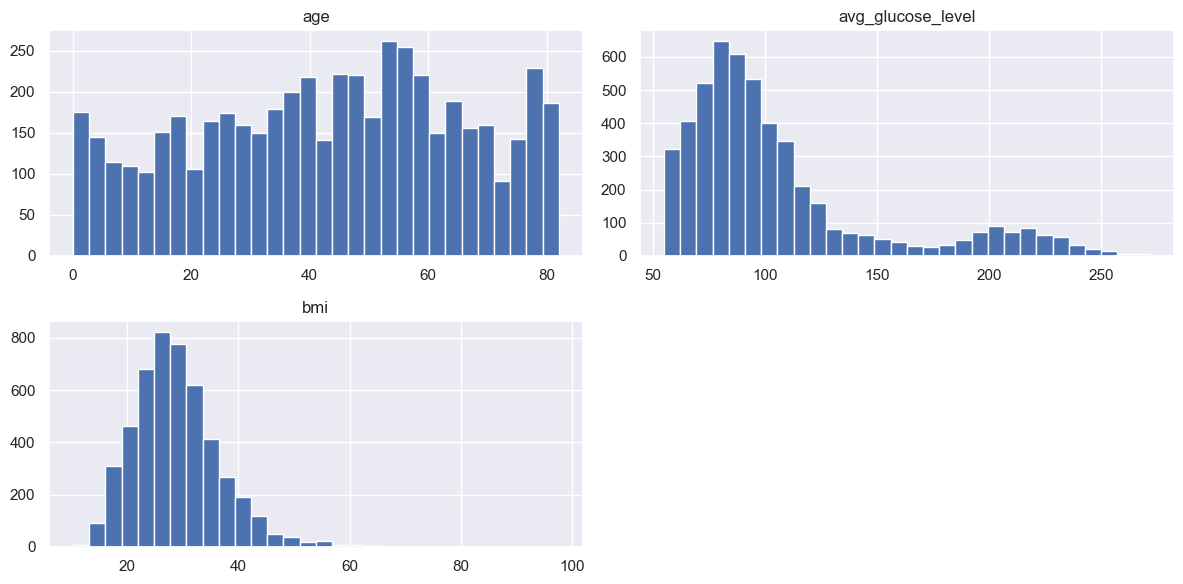

In [32]:
#Histogramas var numéricas
num_vars = ['age','avg_glucose_level','bmi']

ax = df[num_vars].hist(bins=30, figsize=(12,6))
plt.tight_layout()
plt.savefig(FIGURAS / "figura1_histogramas_numericas.png", dpi=300)
plt.show()

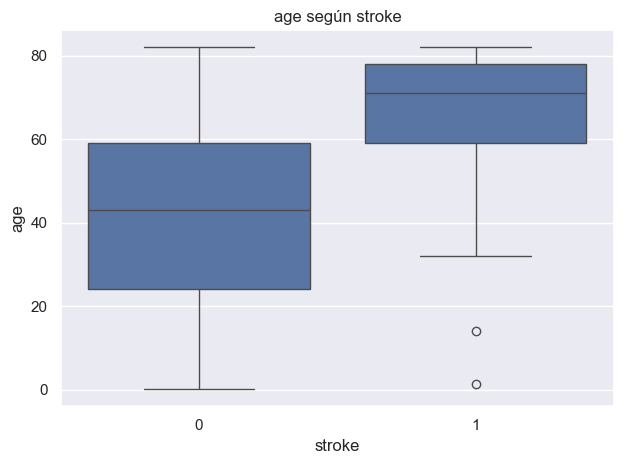

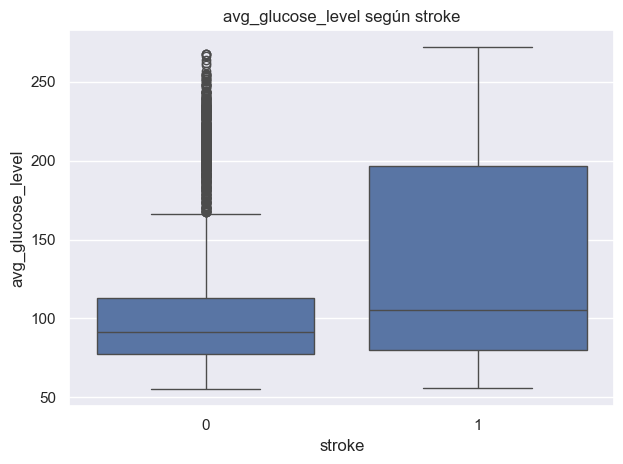

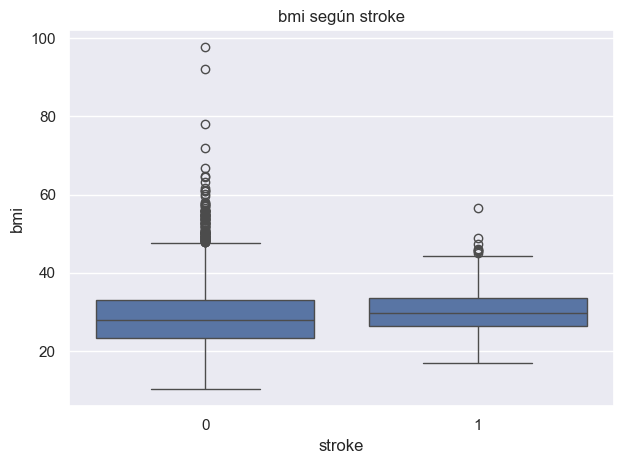

In [33]:
#Boxplots por clase
for col in num_vars:
    sns.boxplot(data=df, x='stroke', y=col)
    plt.title(f"{col} según stroke")
    plt.tight_layout()
    plt.savefig(FIGURAS / f"figura2_boxplot_{col}.png", dpi=300)
    plt.show()

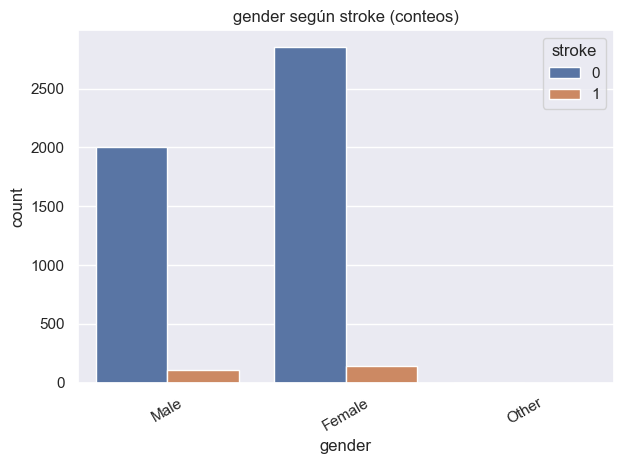

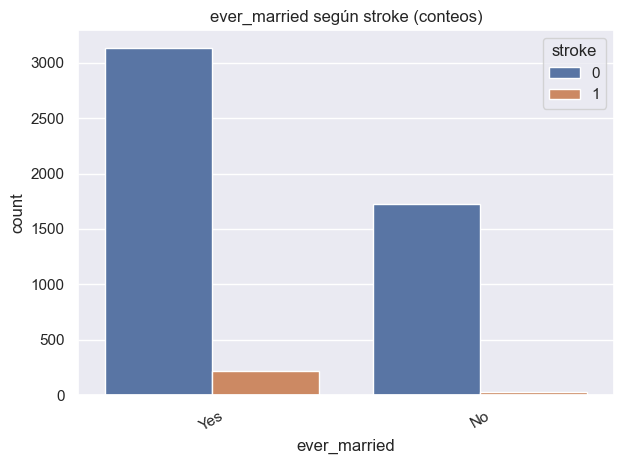

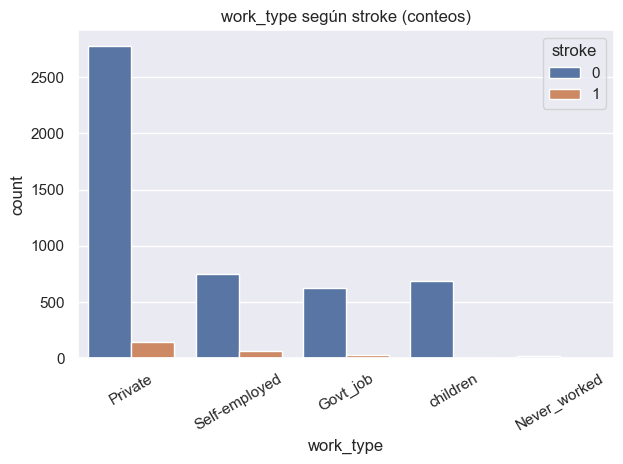

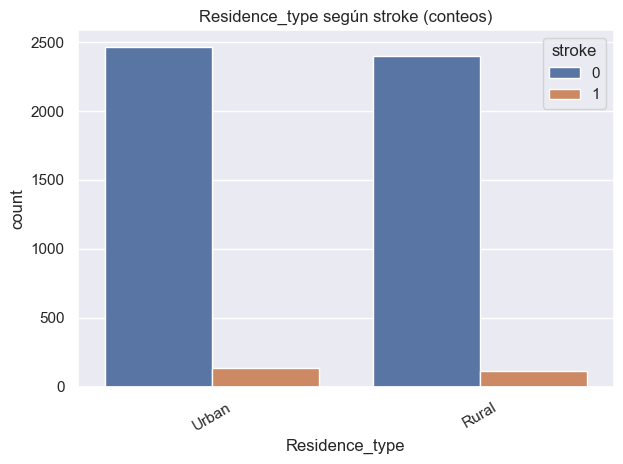

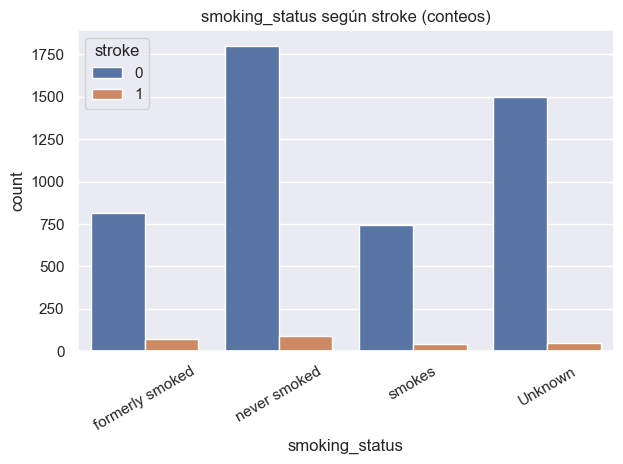

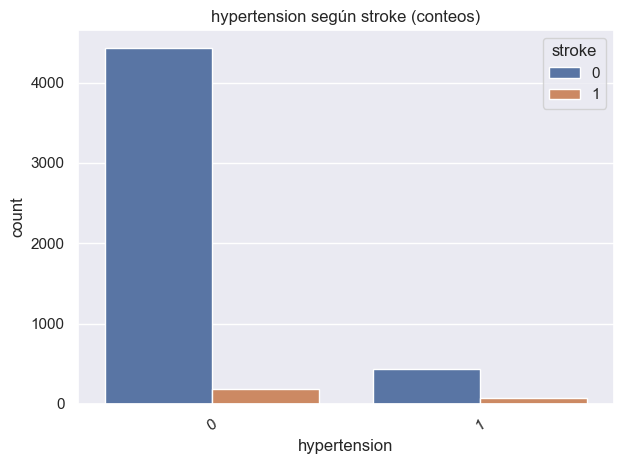

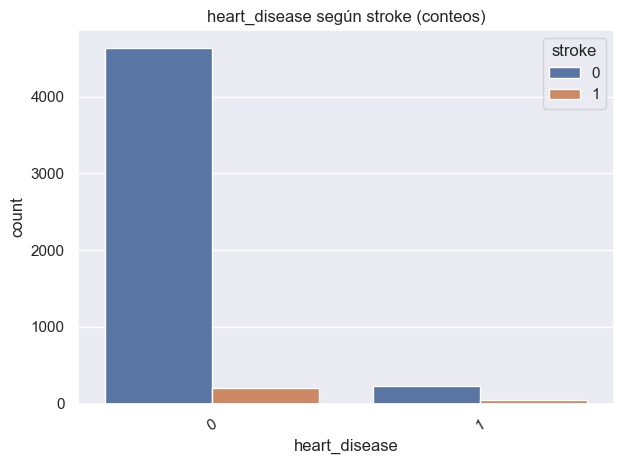

In [34]:
#Graf barras var categóricas
for col in cat_vars:
    sns.countplot(data=df, x=col, hue='stroke')
    plt.title(f"{col} según stroke (conteos)")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.savefig(FIGURAS / f"figura3a_bar_{col}.png", dpi=300)
    plt.show()

IndexError: index 6 is out of bounds for axis 0 with size 6

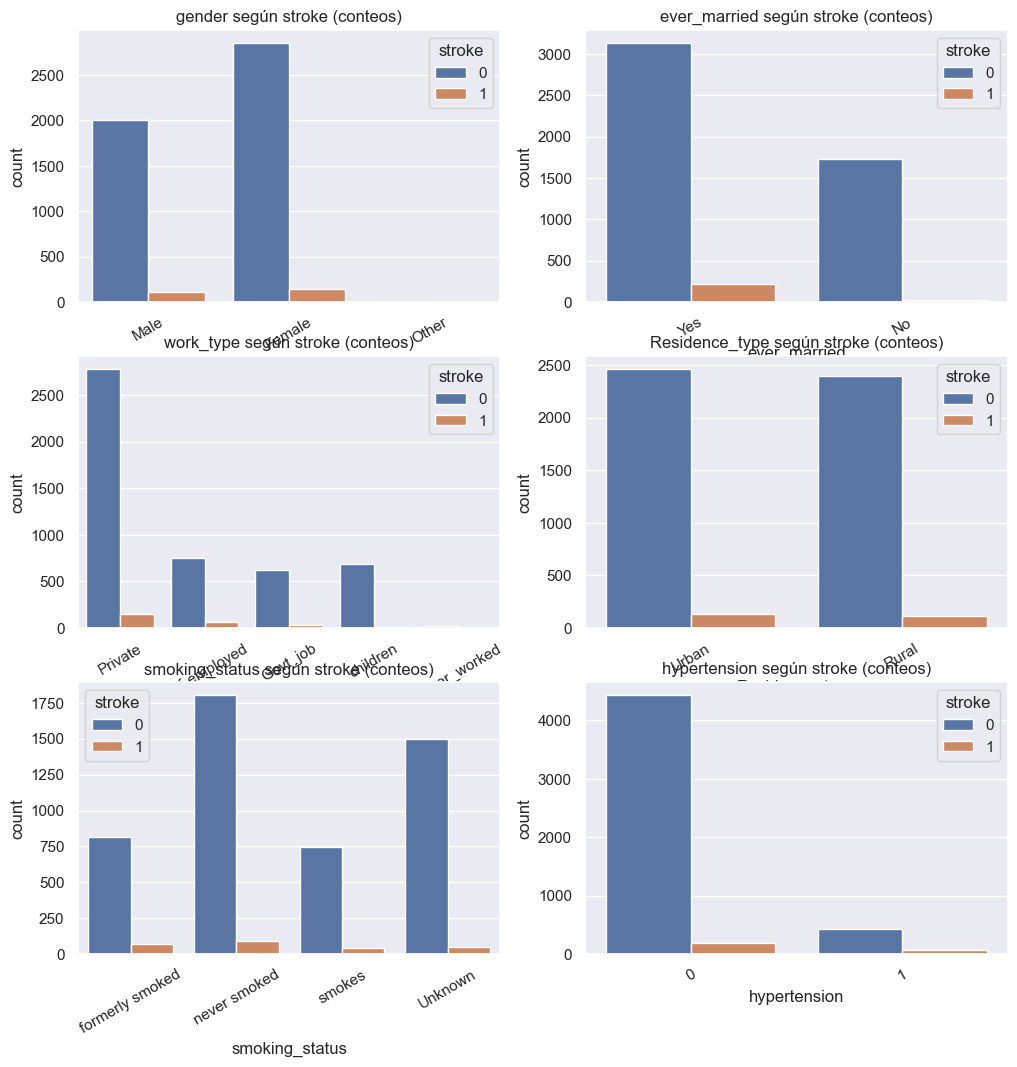

In [35]:
# Gráficos var cat
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
axes = axes.flatten()

for i, col in enumerate(cat_vars):
    sns.countplot(data=df, x=col, hue="stroke", ax=axes[i])
    axes[i].set_title(f"{col} según stroke (conteos)")
    axes[i].tick_params(axis="x", rotation=30)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig(FIGURAS / "Figura1a_categoricas.png", dpi=300)
plt.show()

In [ ]:
#Porcentajes caso Stroke
from matplotlib.ticker import FuncFormatter

for col in cat_vars:
    # Calcular % de stroke en cada categoría
    prop_stroke = (df.groupby(col)['stroke']
                     .mean()
                     .reset_index(name="stroke_rate"))
    
    # Gráfico de proporciones
    sns.barplot(data=prop_stroke, x=col, y="stroke_rate")
    plt.title(f"Porcentaje de stroke en {col}")
    plt.ylabel("Proporción de stroke (1)")
    plt.xticks(rotation=30)
    plt.ylim(0,0.2)
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y,_: f'{y:.0%}'))
    
    plt.tight_layout()
    plt.savefig(FIGURAS / f"figura3b_porcentaje_stroke_{col}.png", dpi=300)
    plt.show()

In [ ]:
#Matriz correlación
corr = df[['age','avg_glucose_level','bmi','stroke']].corr()

# Guardar tabla
corr.to_csv(TABLAS / "tabla4_correlaciones.csv")

# Gráfico heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación")
plt.tight_layout()
plt.savefig(FIGURAS / "figura4_matriz_correlacion.png", dpi=300)
plt.show()

In [36]:
# ===============================================
# Contrastes de hipótesis (Notebook 01 - EDA)
# ===============================================
import os
import numpy as np
import pandas as pd
from scipy import stats

# ---------- Config ----------
DATA_PATH = Path("../data/stroke.csv")      
OUT_DIR   = "outputs"                
os.makedirs(OUT_DIR, exist_ok=True)

# ---------- Cargar datos ----------
df = pd.read_csv(DATA_PATH)


df.columns = [c.strip().lower() for c in df.columns]

if df['stroke'].dtype != np.number:
    # si viene como objeto/booleano, tratar de convertir
    df['stroke'] = pd.to_numeric(df['stroke'], errors='coerce')
df = df.dropna(subset=['stroke'])
df['stroke'] = df['stroke'].astype(int)


cat_vars = [
    'gender', 'ever_married', 'work_type', 'residence_type',
    'smoking_status', 'hypertension', 'heart_disease'
]

def cramers_v_corrected(confusion):
    """V de Cramér con corrección de sesgo (Bergsma, 2013)."""
    chi2 = stats.chi2_contingency(confusion, correction=False)[0]
    n = confusion.sum().sum()
    r, k = confusion.shape
    phi2 = chi2 / n
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1))) if min((kcorr-1), (rcorr-1))>0 else np.nan

chi_rows = []
for var in cat_vars:
    if var not in df.columns:
        continue
    # Contingencia var x stroke
    sub = df[[var, 'stroke']].dropna()
  
    table = pd.crosstab(sub[var].astype(str), sub['stroke'])
    # tablas degeneradas
    if table.shape[0] < 2 or table.shape[1] < 2:
        chi2, p, dof = np.nan, np.nan, np.nan
        v = np.nan
    else:
        chi2, p, dof, _ = stats.chi2_contingency(table, correction=False)
        v = cramers_v_corrected(table)
    chi_rows.append({
        'variable': var,
        'n_total': len(sub),
        'niveles': table.shape[0],
        'chi2': chi2,
        'gl': dof,
        'p_value': p,
        'cramers_v': v
    })

chi_df = pd.DataFrame(chi_rows).sort_values('p_value', na_position='last')
chi_df.to_csv(os.path.join(OUT_DIR, 'contrastes_chi2.csv'), index=False)


num_vars = ['age', 'avg_glucose_level', 'bmi']

def cohens_d(a, b):
    """d de Cohen con varianzas desiguales (pooled por grupos)."""
    a, b = np.asarray(a), np.asarray(b)
    na, nb = len(a), len(b)
    sa2, sb2 = np.var(a, ddof=1), np.var(b, ddof=1)
    # pooled (Hedges puede usarse si quieres corrección small-sample)
    s_pooled = np.sqrt(((na-1)*sa2 + (nb-1)*sb2) / (na+nb-2)) if (na+nb-2) > 0 else np.nan
    return (np.mean(a) - np.mean(b)) / s_pooled if s_pooled and not np.isclose(s_pooled,0) else np.nan

tt_rows = []
for var in num_vars:
    if var not in df.columns:
        continue
    sub = df[[var, 'stroke']].dropna()
    g0 = sub.loc[sub['stroke']==0, var].values
    g1 = sub.loc[sub['stroke']==1, var].values

    t_stat, p_t = stats.ttest_ind(g1, g0, equal_var=False, nan_policy='omit')
 
    try:
        u_stat, p_u = stats.mannwhitneyu(g1, g0, alternative='two-sided')
    except ValueError:
        # si grupos vacíos
        u_stat, p_u = np.nan, np.nan
    # Efecto (d Cohen; signo positivo = mayor en stroke=1)
    d = cohens_d(g1, g0)
    # Descriptivos
    desc = {
        'variable': var,
        'n_stroke1': len(g1),
        'mean_stroke1': np.mean(g1) if len(g1) else np.nan,
        'sd_stroke1': np.std(g1, ddof=1) if len(g1) > 1 else np.nan,
        'n_stroke0': len(g0),
        'mean_stroke0': np.mean(g0) if len(g0) else np.nan,
        'sd_stroke0': np.std(g0, ddof=1) if len(g0) > 1 else np.nan,
        't_welch': t_stat,
        'p_t_welch': p_t,
        'u_mannwhitney': u_stat,
        'p_u_mannwhitney': p_u,
        'cohens_d': d
    }
    tt_rows.append(desc)

tt_df = pd.DataFrame(tt_rows)
tt_df.to_csv(os.path.join(OUT_DIR, 'contrastes_t_mannwhitney.csv'), index=False)

#RESUMEN

def fmt_p(p):
    if pd.isna(p):
        return ""
    return "<0.001" if p < 0.001 else f"{p:.3f}"

def fmt(x, nd=3):
    return "" if pd.isna(x) else f"{x:.{nd}f}"

# Top de categóricas por significancia (p) y todas las numéricas
chi_sel = chi_df[['variable','n_total','niveles','chi2','gl','p_value','cramers_v']].copy()
chi_sel.rename(columns={
    'variable':'Variable (cat)',
    'n_total':'N',
    'niveles':'#niveles',
    'chi2':'Chi2',
    'gl':'gl',
    'p_value':'p',
    'cramers_v':'V de Cramér'
}, inplace=True)
chi_sel['p'] = chi_sel['p'].apply(fmt_p)
chi_sel['Chi2'] = chi_sel['Chi2'].apply(lambda x: fmt(x,3))
chi_sel['V de Cramér'] = chi_sel['V de Cramér'].apply(lambda x: fmt(x,3))

tt_sel = tt_df[['variable','n_stroke1','mean_stroke1','sd_stroke1','n_stroke0','mean_stroke0','sd_stroke0','t_welch','p_t_welch','u_mannwhitney','p_u_mannwhitney','cohens_d']].copy()
tt_sel.rename(columns={
    'variable':'Variable (num)',
    'n_stroke1':'n (stroke=1)',
    'mean_stroke1':'Media (1)',
    'sd_stroke1':'DE (1)',
    'n_stroke0':'n (stroke=0)',
    'mean_stroke0':'Media (0)',
    'sd_stroke0':'DE (0)',
    't_welch':'t (Welch)',
    'p_t_welch':'p (Welch)',
    'u_mannwhitney':'U (Mann-Whitney)',
    'p_u_mannwhitney':'p (Mann-Whitney)',
    'cohens_d':'d de Cohen'
}, inplace=True)

#Formateo de p y efectos
tt_sel['p (Welch)'] = tt_sel['p (Welch)'].apply(fmt_p)
tt_sel['p (Mann-Whitney)'] = tt_sel['p (Mann-Whitney)'].apply(fmt_p)
for c in ['Media (1)','DE (1)','Media (0)','DE (0)','t (Welch)','U (Mann-Whitney)','d de Cohen']:
    tt_sel[c] = tt_sel[c].apply(lambda x: fmt(x,3))

# Guardar resuenes
chi_sel.to_csv(os.path.join(OUT_DIR, 'contrastes_resumen_para_Tabla4_categoricas.csv'), index=False)
tt_sel.to_csv(os.path.join(OUT_DIR, 'contrastes_resumen_para_Tabla4_numericas.csv'), index=False)

print("Contrastes completados")
print(f"- {os.path.join(OUT_DIR, 'contrastes_chi2.csv')}")
print(f"- {os.path.join(OUT_DIR, 'contrastes_t_mannwhitney.csv')}")
print(f"- {os.path.join(OUT_DIR, 'contrastes_resumen_para_Tabla4_categoricas.csv')}")
print(f"- {os.path.join(OUT_DIR, 'contrastes_resumen_para_Tabla4_numericas.csv')}")
print(f"- {os.path.join(OUT_DIR, 'contrastes_resumen_para_Tabla4.xlsx')}")

D:\NuevoTemp\ipykernel_17472\627783570.py:20: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df['stroke'].dtype != np.number:


Contrastes completados
- outputs\contrastes_chi2.csv
- outputs\contrastes_t_mannwhitney.csv
- outputs\contrastes_resumen_para_Tabla4_categoricas.csv
- outputs\contrastes_resumen_para_Tabla4_numericas.csv
- outputs\contrastes_resumen_para_Tabla4.xlsx
